In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

defaulter= pd.read_csv("D:/aiml/defaulter.csv")
defaulter


,defaulter,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [57]:
from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


In [58]:
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [60]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)


0.977375 0.967


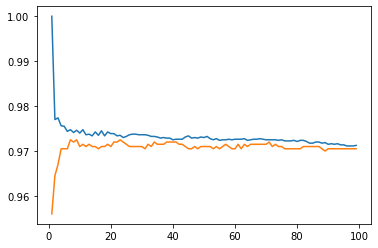

In [62]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)